# Use logistic regression for modelling

Here, we use the kickstarter_modelling.csv file generated in the EDA notebook for modelling. We decided to use a simple logistic regression as baseline model that we will try to surpass with more sophisticated modelling algorithms.

In [1]:
# import the necessary packages
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

RSEED = 45


In [2]:
# import the file
df_baseline = pd.read_csv('data/kickstarter_modeling.csv')
df_baseline.head()

,funding_goal,outcome,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,1000,0,39,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,80000,0,87,2009,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,20,1,8,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99,1,79,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1900,0,28,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# define outcome as target and the rest as features
X = df_baseline.drop('outcome', axis=1)
y = df_baseline['outcome']
X.shape, y.shape

((331462, 196), (331462,))

In [4]:
# train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=RSEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248596, 196), (82866, 196), (248596,), (82866,))

In [5]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# run the prediction
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

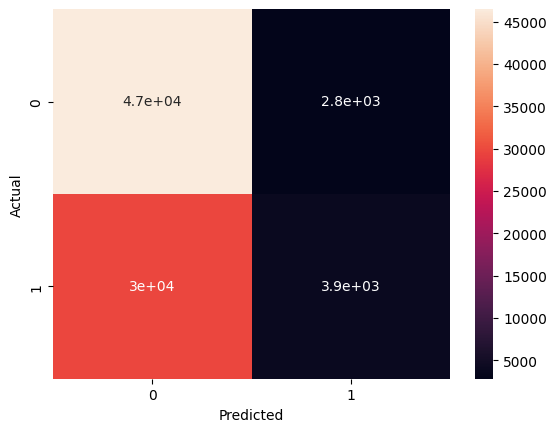

In [7]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True);

## Interpretation

Even though the true negatives look good the true positives are terrible as well as the false positives. I think this will perform well as baseline model. Other models should be able to improve this.

In [9]:
acc_train = accuracy_score(y_pred_train, y_train)
acc = accuracy_score(y_pred, y_test)
print(f'Train accuracy is : {acc_train}')
print(f'Test accuracy is : {acc}')

print('---' * 17)

prec_train = precision_score(y_pred_train, y_train)
prec = precision_score(y_pred, y_test)
print(f'Train precision is : {prec_train}')
print(f'Test precision is : {prec}')

print('---' * 17)

reca_train = recall_score(y_pred_train, y_train)
reca = recall_score(y_pred, y_test)
print(f'Train recall is : {reca_train}')
print(f'Test recall is : {reca}')

print('---' * 17)

f1_train = f1_score(y_pred_train, y_train)
f1 = f1_score(y_pred, y_test)
print(f'Train f1 score is : {f1_train}')
print(f'Test f1 score is : {f1}')

print('---' * 17)

roc_train = roc_auc_score(y_pred_train, y_train)
roc = roc_auc_score(y_pred, y_test)
print(f'Train roc_auc is : {roc_train}')
print(f'Test roc_auc is : {roc}')

Train accuracy is : 0.60800254227743
Test accuracy is : 0.6080056959428475
---------------------------------------------------
Train precision is : 0.11265204386839482
Test precision is : 0.11570444994187953
---------------------------------------------------
Train recall is : 0.5721881804831114
Test recall is : 0.5797491039426523
---------------------------------------------------
Train f1 score is : 0.1882429381825452
Test f1 score is : 0.1929087882326633
---------------------------------------------------
Train roc_auc is : 0.591640542268875
Test roc_auc is : 0.5951193990239716


## Interpretation

Obviously the precision is terrible and also the rest is not good.